In [69]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# from glob import glob as g
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np

In [20]:
# DIRECOTRY="D:\ocv\dataset"
DIRECOTRY="ocv/dataset"
CATEGORIES=['cats','dogs']

IMG_SIZE=32
data=[]

In [21]:
for category in CATEGORIES:
    folder=os.path.join(DIRECOTRY,category)
    label=CATEGORIES.index(category)
    print(folder)
    for img in os.listdir(folder):
         img_path=os.path.join(folder,img)
         img_arr=cv2.imread(img_path)
         img_arr= cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
         data.append([img_arr,label])
         

len(data)


ocv/dataset/cats
ocv/dataset/dogs


1601

In [22]:
# data[1][0][0][0]

In [23]:
random.shuffle(data)

X=[]
y=[]

for features, labels in data:
    X.append(features)
    y.append(labels)
    
X=np.array(X)
y=np.array(y)


pickle.dump(X,open('X.pk1','wb'))    
pickle.dump(y,open('y.pk1','wb'))

X=X/255
print(X.shape)


(1601, 32, 32, 3)


In [25]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='sigmoid')
    
    ])



In [27]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn.fit(X,y,epochs=2)

Epoch 1/2
51/51 [==============================] - 3s 17ms/step - loss: 0.6891 - accuracy: 0.5353
Epoch 2/2
51/51 [==============================] - 1s 16ms/step - loss: 0.6654 - accuracy: 0.6021


In [34]:
# cnn["history"]

In [32]:
# y

array([1, 0, 1, ..., 0, 0, 0])

In [30]:
y_test = y

y_test=y.reshape(-1,)

print(y_test[:5])

X_test = X



[1 0 1 0 0]


In [33]:
# sample(X_test,y_test,1)

# y_pred=cnn.predict(X_test)
# y_pred[:5]

# y_classes=[np.argmax(element) for element in y_pred]
# y_classes[:5]

# classes[y_classes[1]]

# classes[y_classes[2]]


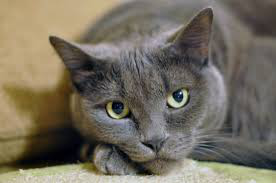

In [49]:
# img = load_img('test_dog1.jpg')  # this is a PIL image
# img = load_img('test_dog2.jpg')  # this is a PIL image


# img = load_img('test_cat1.jpg')  # this is a PIL image
# img = load_img('test_cat2.jpg')  # this is a PIL image
# img = load_img('test_cat3.jpg')  # this is a PIL image

x = img_to_array(img.resize([32, 32]))  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

img

In [46]:
if (cnn.predict_classes(x) == 1):
    print("It is a DOG")
else:
    print("It is a Cat")

cnn.predict_classes(x)

It is a DOG


array([1])

# Resnet50

In [59]:
# from tensorflow.keras.models import *
# from tensorflow.keras.layers import *
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.metrics import categorical_crossentropy
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.metrics import confusion_matrix
# from tensorflow.keras.applications.densenet import DenseNet121
# from tensorflow.keras.callbacks import *
# from tensorflow.keras import backend as K

In [63]:
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3))

output = restnet.layers[-1].output
output = Flatten()(output)
output = Dropout(0.5)(output)
output = Dense(1, activation="softmax")(output)


restnet = Model(restnet.input, outputs=output)
for layer in restnet.layers:
    layer.trainable = False


restnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

restnet.summary(line_length=100)

Model: "model_3"
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_7 (InputLayer)             [(None, 32, 32, 3)]   0                                            
____________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)        (None, 38, 38, 3)     0           input_7[0][0]                    
____________________________________________________________________________________________________
conv1_conv (Conv2D)              (None, 16, 16, 64)    9472        conv1_pad[0][0]                  
____________________________________________________________________________________________________
conv1_bn (BatchNormalization)    (None, 16, 16, 64)    256         conv1_conv[0][0]                 
__________________________________________________________________________

In [65]:
restnet.fit(X,y,epochs=10)

Epoch 1/10
51/51 [==============================] - 3s 64ms/step - loss: 0.0000e+00 - accuracy: 0.5003
Epoch 2/10
51/51 [==============================] - 3s 63ms/step - loss: 0.0000e+00 - accuracy: 0.5003
Epoch 3/10
51/51 [==============================] - 3s 65ms/step - loss: 0.0000e+00 - accuracy: 0.5003
Epoch 4/10
51/51 [==============================] - 3s 64ms/step - loss: 0.0000e+00 - accuracy: 0.5003
Epoch 5/10
51/51 [==============================] - 4s 69ms/step - loss: 0.0000e+00 - accuracy: 0.5003
Epoch 6/10
51/51 [==============================] - 3s 69ms/step - loss: 0.0000e+00 - accuracy: 0.5003
Epoch 7/10
51/51 [==============================] - 3s 65ms/step - loss: 0.0000e+00 - accuracy: 0.5003
Epoch 8/10
51/51 [==============================] - 3s 65ms/step - loss: 0.0000e+00 - accuracy: 0.5003
Epoch 9/10
51/51 [==============================] - 3s 64ms/step - loss: 0.0000e+00 - accuracy: 0.5003
Epoch 10/10
51/51 [==============================] - 3s 65ms/step - loss:

In [91]:
from keras.preprocessing import image

# path = 'test_dog2.jpg'

path = 'test_cat3.jpg'

def prepare(img_path):
    img = image.load_img(img_path, target_size=(32,32))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

result = restnet.predict([prepare(path)])


[0]


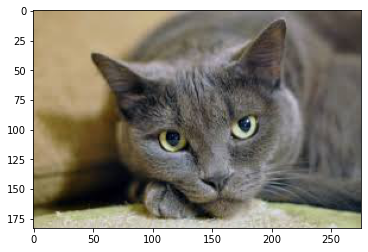

In [92]:
d=image.load_img(path)
plt.imshow(d)
x=np.argmax(result,axis=1)
# print (Classes[int(x)])
print(x)